
# Week 04 – Image Processing Assignment

## Topics Covered
- Power Law Transformation (Gamma Correction)
- Image Negative
- Gamma Curves Analysis
- Intensity Range Mapping
- Practical Image Enhancement Techniques

**Student Name:** Aziz Rixsiev    
**Student ID:** 230849    
**Course:** Computer Science    
**Instructor:** B. Kiani      
**Date:** 23 February 2026

---

## Submission Rules
- All solutions must be implemented in code.
- Output images must be clearly displayed.
- Code must be clean and well-structured.
- No theoretical explanation sections required.

---



# Part 1 – Power Law Transformation (Gamma Correction)

### Challenge 1.1
Implement a function `gamma_correction(image, gamma)` from scratch.

Requirements:
- Normalize image to [0,1]
- Apply power-law transformation
- Convert back to uint8
- Display original and corrected image side by side

---


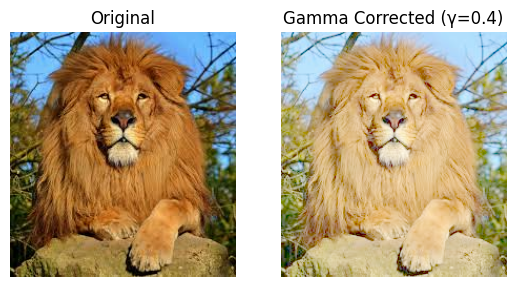

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(img, c, gamma):
     
     # Normilize
     img_norm = img.astype('float32') / 255

     # Apply power law
     img_gamma = c * (img_norm ** gamma)

     # Back to uint8
     img_res = np.clip(img_gamma * 255, 0, 255).astype('uint8')

     return img_res

img = cv2.cvtColor(cv2.imread('lion.jpeg'), cv2.COLOR_BGR2RGB)

img_res = gamma_correction(img, 1.0, 0.4)

# Original
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# After gamma corection
plt.subplot(1, 2, 2)
plt.imshow(img_res)
plt.title('Gamma Corrected (γ=0.4)')
plt.axis('off')

plt.show()
    



### Challenge 1.2 – Gamma Curve Analysis

1. Generate intensity values r in range [0,1].
2. Plot gamma curves for at least 5 different gamma values.
3. Ensure all curves appear in one plot.

---


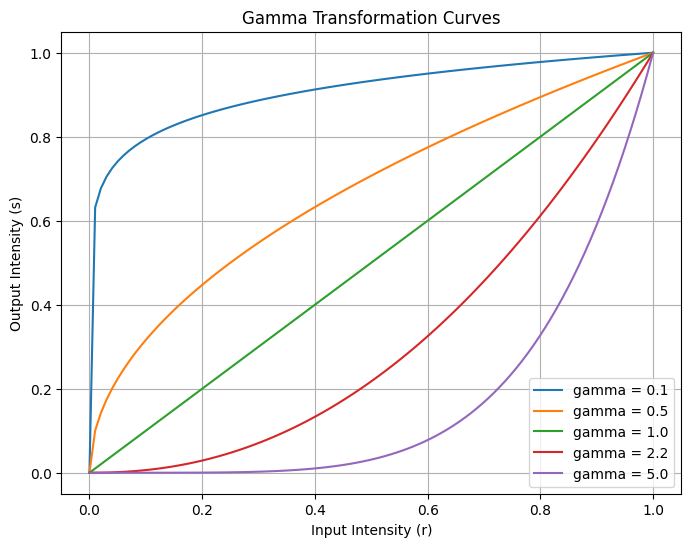

In [2]:
r = np.linspace(0, 1, 100)

gamma_values = [0.1, 0.5, 1.0, 2.2, 5.0]

plt.figure(figsize=(8, 6))

for g in gamma_values:
    s = r ** g
    plt.plot(r, s, label=f'gamma = {g}')

plt.title('Gamma Transformation Curves')
plt.xlabel('Input Intensity (r)')
plt.ylabel('Output Intensity (s)')
plt.legend()
plt.grid(True)
plt.show()


### Challenge 1.3 – Comparative Study

Apply gamma values:
- 0.5
- 1.0
- 2.0

Display results in a structured layout.
Add titles clearly indicating gamma value.

---


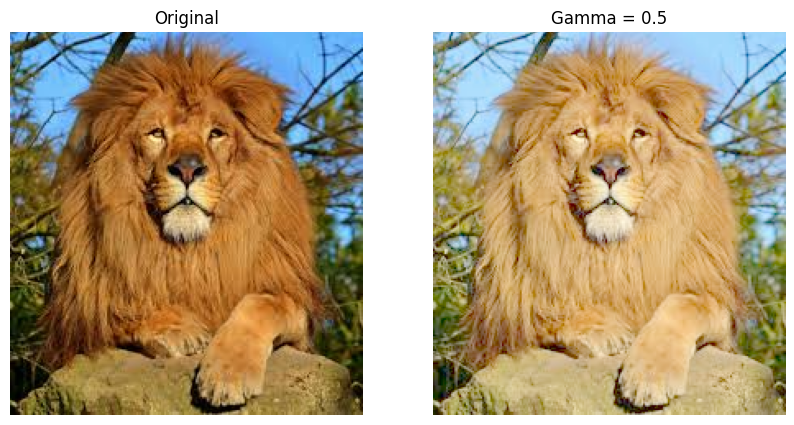

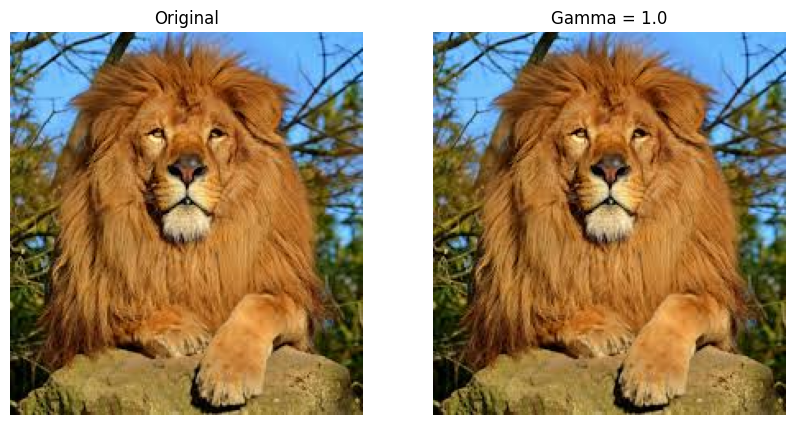

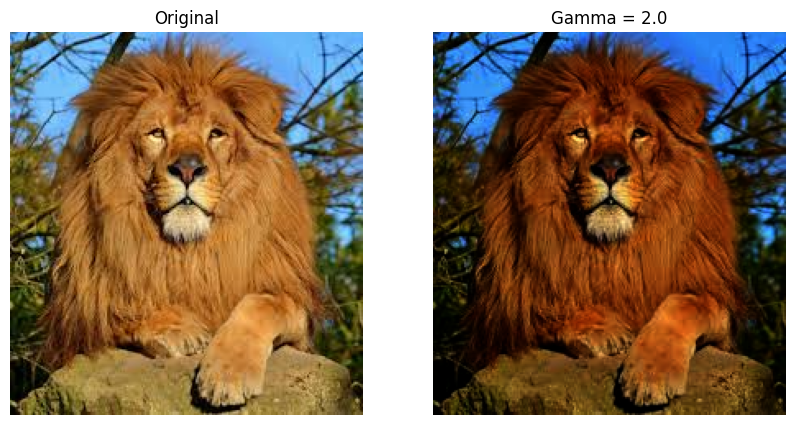

In [3]:
img = cv2.cvtColor(cv2.imread('lion.jpeg'), cv2.COLOR_BGR2RGB)

combinations = [0.5, 1.0, 2.0]

for g in combinations:
    img_res = gamma_correction(img, 1.0, g)

    plt.figure(figsize=(10, 5)) 

    # Original
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis('off')

    # After gamma correction
    plt.subplot(1, 2, 2) 
    plt.imshow(img_res)
    plt.title(f"Gamma = {g}") 
    plt.axis('off')

    plt.show



# Part 2 – Basic Intensity Transformations

### Challenge 2.1 – Image Negative

Create an image negative function without using built-in shortcuts.

Formula must be implemented manually.

---


(np.float64(-0.5), np.float64(3839.5), np.float64(2159.5), np.float64(-0.5))

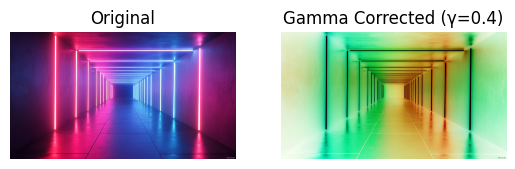

In [4]:
def image_negative(img):
    img_res = 255 - img

    return img_res

img = cv2.cvtColor(cv2.imread('neon.jpeg'), cv2.COLOR_BGR2RGB)

img_res = image_negative(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_res)
plt.title('Gamma Corrected (γ=0.4)')
plt.axis('off')




### Challenge 2.2 – Intensity Range Mapping

Set pixel intensity range [A, B] to white (255).

Requirements:
- Accept A and B as parameters.
- Leave other pixels unchanged.
- Display before and after.

---


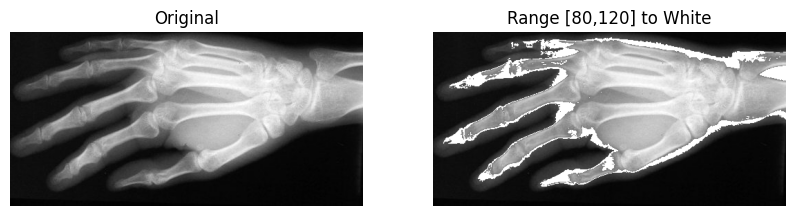

In [7]:
def intensity_range_mapping(img, A, B):
    img_res = img.copy()

    mask = (img >= A) & (img <= B)

    img_res[mask] = 255

    return img_res


img = img = cv2.cvtColor(cv2.imread('hand.jpg'), cv2.COLOR_BGR2RGB)
A, B = 80, 120
img_res = intensity_range_mapping(img, A, B)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(img); plt.title('Original'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_res); plt.title(f'Range [{A},{B}] to White'); plt.axis('off')
plt.show()



### Challenge 2.3 – Integrated Enhancement

Create a pipeline that:
1. Reads image
2. Applies gamma correction
3. Applies intensity mapping
4. Displays final enhanced image

---


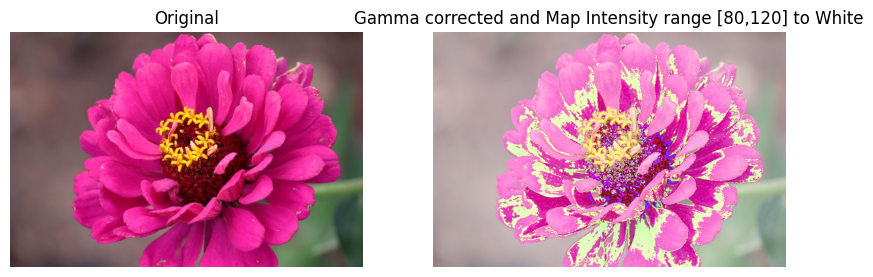

In [13]:
def integrated_enhancement_pipeline(img, c, gamma, A, B):
    img_gamma = gamma_correction(img, c, gamma)
    final_res = intensity_range_mapping(img_gamma, A, B)

    return final_res

img = cv2.cvtColor(cv2.imread('flower.jpg'), cv2.COLOR_BGR2RGB)
img_res = integrated_enhancement_pipeline(img, 1.0, 0.4, 70, 100)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(img); plt.title('Original'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_res); plt.title(f'Gamma corrected and Map Intensity range [{A},{B}] to White'); plt.axis('off')
plt.show()



# Part 3 – Advanced Optimization Challenge

### Challenge 3.1 – Performance & Robustness

Improve your functions by:

- Adding input validation
- Handling grayscale and RGB images
- Avoiding redundant computations
- Structuring reusable functions

---

### Final Task

Create one clean final script that performs:
- Gamma analysis
- Negative transformation
- Intensity mapping
- Final comparison visualization

---


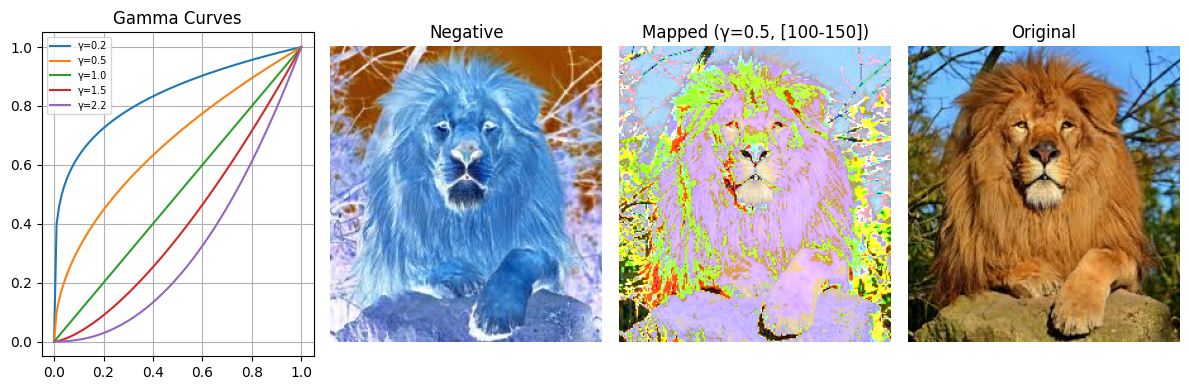

In [ ]:
def validate_image(image):
    if image is None:
        raise ValueError("Image not found! Check the file path.")
    return image

def gamma_correction(image, c=1.0, gamma=1.0):
    img_float = image.astype('float32') / 255.0
    res = c * (img_float ** gamma)
    return np.clip(res * 255, 0, 255).astype('uint8')

def image_negative(image):
    return (255 - image).astype('uint8')

def intensity_range_mapping(image, A, B):
    img_res = image.copy()
    mask = (image >= A) & (image <= B)
    img_res[mask] = 255
    return img_res

def run_final_task(image_path):
    try:
        raw_img = cv2.imread(image_path)
        img = validate_image(cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB))
        
        plt.figure(figsize=(12, 4))
        r = np.linspace(0, 1, 100)
        gammas = [0.2, 0.5, 1.0, 1.5, 2.2]
        
        plt.subplot(1, 4, 1)
        for g in gammas:
            plt.plot(r, r**g, label=f'γ={g}')
        plt.title("Gamma Curves")
        plt.legend(prop={'size': 7})
        plt.grid(True)

        neg = image_negative(img)
        plt.subplot(1, 4, 2)
        plt.imshow(neg)
        plt.title("Negative")
        plt.axis('off')

        gamma_mid = gamma_correction(img, gamma=0.5)
        mapped = intensity_range_mapping(gamma_mid, 100, 150)
        
        plt.subplot(1, 4, 3)
        plt.imshow(mapped)
        plt.title("Mapped (γ=0.5, [100-150])")
        plt.axis('off')

        plt.subplot(1, 4, 4)
        plt.imshow(img)
        plt.title("Original")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error: {e}")

run_final_task('lion.jpeg')

